<br><div  class="alert alert-success" style="background-color:  #2193b0
; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Happiness Classification Analysis🏵️</center> </b>
    <a name="Overview"></a>
</div>

<h3  style="text-align:center;"><span class="label label-success">Data Preprocessing</span> <span class="label label-success">EDA</span> <span class="label label-success">Data Visualization</span><span class="label label-success">Data Modelling</span><span class="label label-success">Insights</span></h3>


<h1><center style="color:#159364; font-family:cursive;">Introduction</center></h1>


Happiness is a fundamental aspect of our lives, and it plays a crucial role in our overall well-being and satisfaction. Understanding the factors that contribute to happiness can provide valuable insights for individuals, communities, and policymakers alike.

In this notebook, we will delve into a comprehensive dataset collected through a survey that aims to explore the factors influencing people's happiness in different cities. The dataset contains ratings for various metrics of each city, such as the availability of information, housing costs, school quality, trust in the local police, street maintenance, and the availability of social community events. Participants in the survey also indicated their level of happiness.

Our objective is to analyze this dataset and uncover the important factors that contribute to residents' happiness in different cities. By identifying these factors, we can gain valuable insights into what makes people happy in their respective communities, enabling us to make informed decisions and implement measures to improve overall happiness.

<h1><center style="color:#159364; font-family:cursive;">Dataset Overview</center></h1>


The dataset we will be working with comprises responses from the survey conducted among residents of different cities. It includes the following features:

* **infoavail**: Availability of information about city services.
* **housecost**: Cost of housing in the city.
* **schoolquality**: Overall quality of public schools.
* **policetrust**: Trust in the local police.
* **streetquality**: Maintenance of streets and sidewalks.
* **events**: Availability of social community events.
* **happy**: Decision attribute indicating happiness, with values 0 (unhappy) and 1 (happy).

We will explore the relationships between these features and happiness, perform data analysis and visualization, and build a classification model to predict happiness based on the given attributes.

Let's dive into the data and uncover the factors that contribute to residents' happiness in different cities!

<h1><center style="color:#159364; font-family:cursive;">Load libraries & data 🏠</center></h1>

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/happiness-classification-dataset/happydata.csv')

<h1><center style="color:#159364; font-family:cursive;">📃 Basic Analysis 📃</center></h1>

In [3]:
data.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [4]:
data.tail()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0
142,5,3,2,5,5,5,0


In [5]:
# Explore the dataset
print("Dataset shape:", data.shape)
print("Columns in the dataset:", data.columns)

Dataset shape: (143, 7)
Columns in the dataset: Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')


In [6]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64


In [7]:
# Check for duplicates
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 18


In [8]:
# Handle duplicates
data.drop_duplicates(inplace=True)

In [9]:
# Updated dataset after handling missing values and duplicates
print("\nDataset shape after handling missing values and duplicates:", data.shape)


Dataset shape after handling missing values and duplicates: (125, 7)


In [10]:
data.dtypes

infoavail        int64
housecost        int64
schoolquality    int64
policetrust      int64
streetquality    int64
ëvents           int64
happy            int64
dtype: object

<h1><center style="color:#159364; font-family:cursive;">Outlier Detection</center></h1>

In [11]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Loop through each column and detect outliers
for column in data.columns:
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = np.where(z_scores > z_score_threshold)
    
    print("Column:", column)
    print("Number of outliers:", len(outliers[0]))
    print("Indices of outliers:", outliers[0])
    print()

Column: infoavail
Number of outliers: 1
Indices of outliers: [44]

Column: housecost
Number of outliers: 0
Indices of outliers: []

Column: schoolquality
Number of outliers: 0
Indices of outliers: []

Column: policetrust
Number of outliers: 0
Indices of outliers: []

Column: streetquality
Number of outliers: 0
Indices of outliers: []

Column: ëvents
Number of outliers: 2
Indices of outliers: [ 97 118]

Column: happy
Number of outliers: 0
Indices of outliers: []



In [12]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Create a copy of the dataset
data_no_outliers = data.copy()

# Loop through each column and remove outliers
for column in data.columns:
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = np.where(z_scores > z_score_threshold)
    
    # Remove outliers from the copy of the dataset
    data_no_outliers = data_no_outliers.drop(outliers[0])

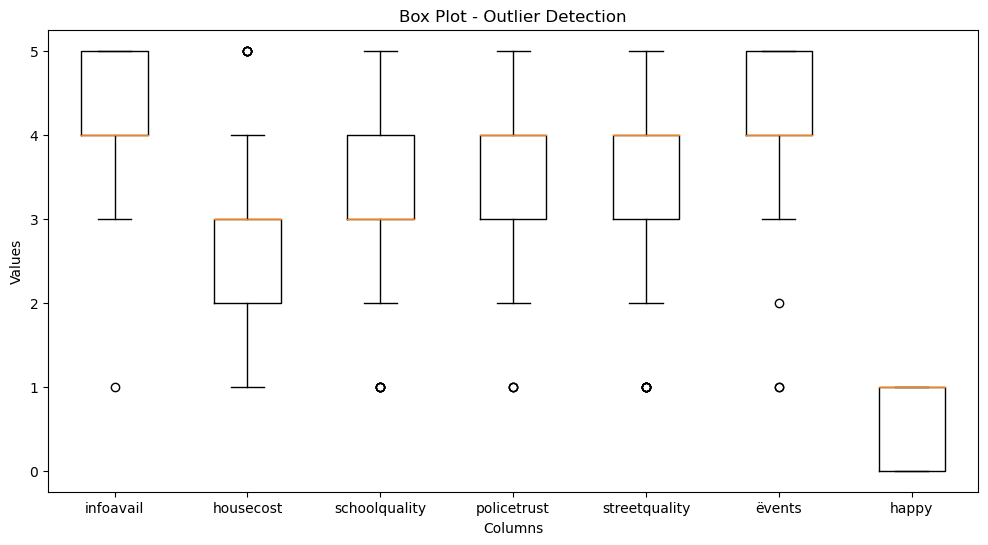

In [13]:
# Create box plots for each column
plt.figure(figsize=(12, 6))
plt.boxplot(data.values, labels=data.columns)
plt.title('Box Plot - Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

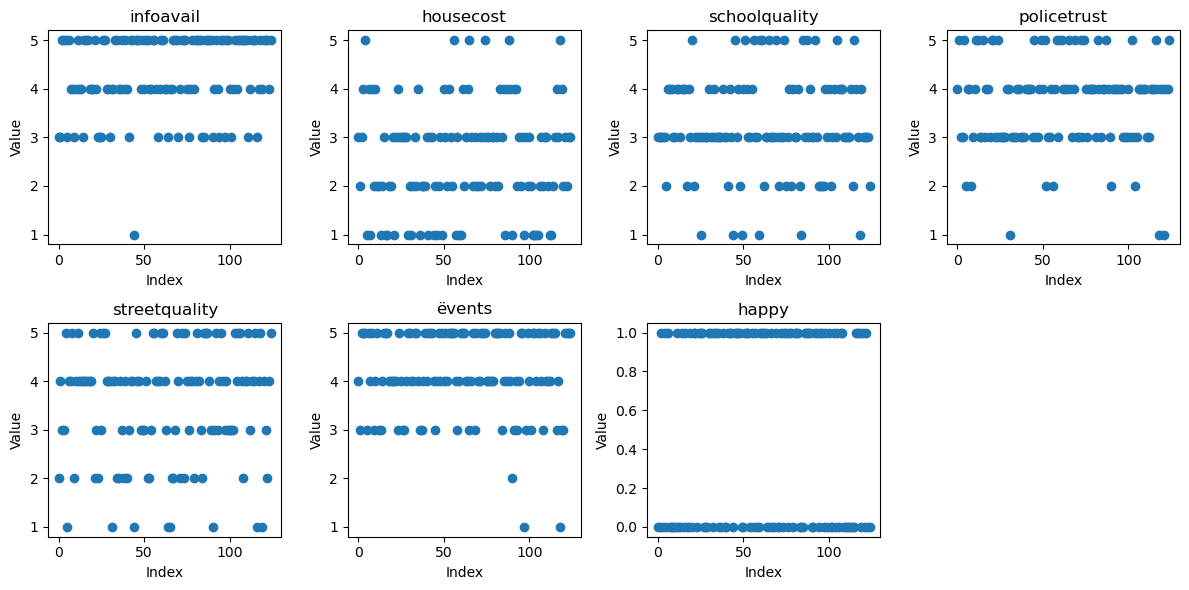

In [14]:
# Create scatter plots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns):
    plt.subplot(2, 4, i+1)
    plt.scatter(range(len(data)), data[column])
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

<h1><center style="color:#159364; font-family:cursive;">Data exploration</center></h1>

**Descriptive statistics**

In [15]:
# Calculate descriptive statistics
data_no_outliers.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,4.303279,2.573770,3.237705,3.704918,3.565574,4.188525,0.500000
std,0.811990,1.112796,0.971097,0.915329,1.164117,0.875110,0.502062
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,4.500000,3.000000,3.000000,4.000000,4.000000,4.000000,0.500000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


**Histograms**

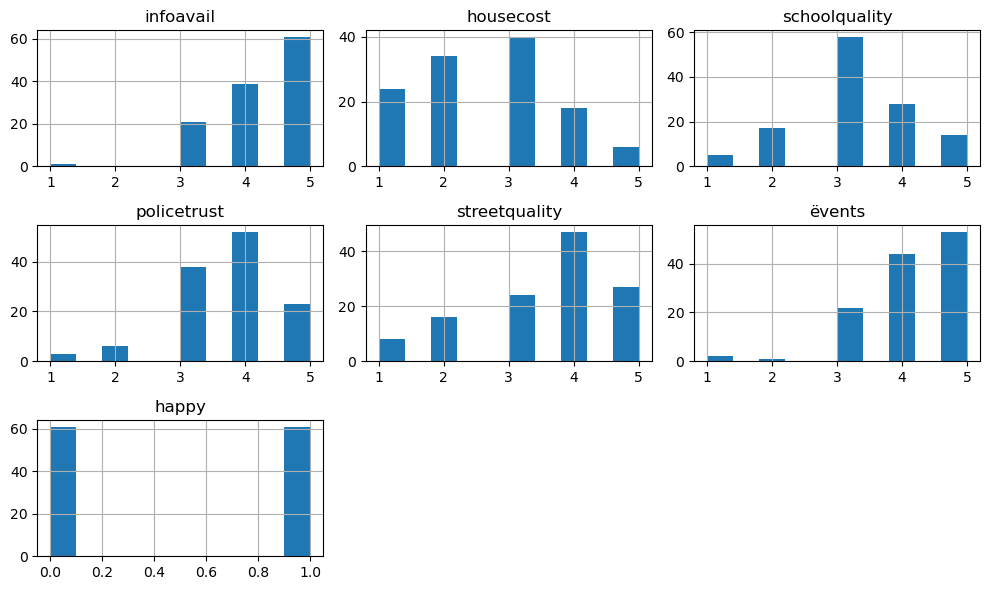

In [16]:
# Create histograms for each variable
data_no_outliers.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

<h1><center style="color:#159364; font-family:cursive;">Correlation analysis</center></h1>

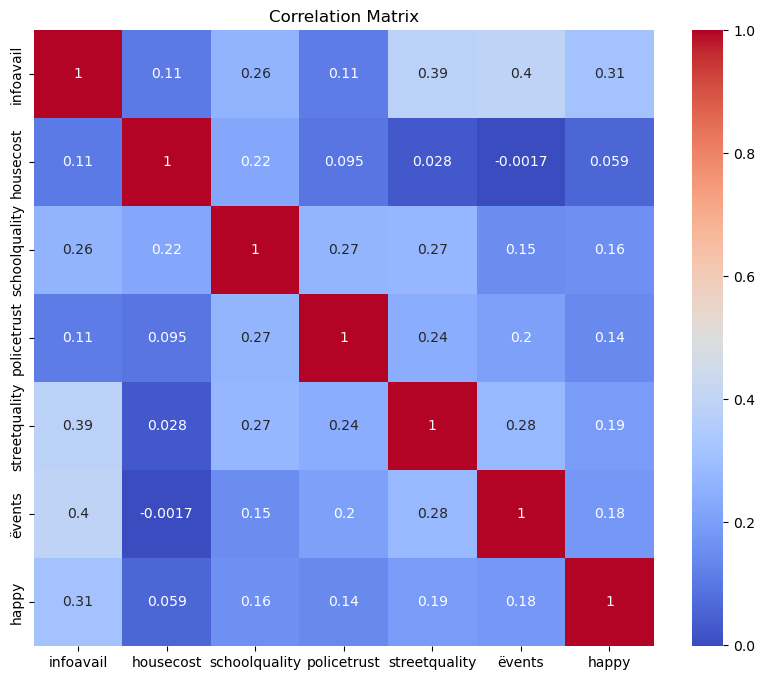

In [17]:
# Calculate the correlation matrix
correlation_matrix = data_no_outliers.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

* The '**streetquality**' variable has the highest positive correlation with 'infoavail' (0.385) and 'ëvents' (0.284), suggesting a moderate positive relationship.
* 'ëvents' also has a relatively high positive correlation with 'infoavail' (0.396) and 'streetquality' (0.284).
* The '**schoolquality**' variable shows moderate positive correlations with 'infoavail' (0.264) and 'policetrust' (0.266).
* The '**happy**' variable has a moderate positive correlation with 'infoavail' (0.314), 'streetquality' (0.191), and 'ëvents' (0.179).

In [18]:
correlation_matrix

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
infoavail,1.000000,0.107657,0.264172,0.110284,0.385343,0.395726,0.314223
housecost,0.107657,1.000000,0.224544,0.094572,0.028134,-0.001670,0.059170
schoolquality,0.264172,0.224544,1.000000,0.265518,0.274868,0.151056,0.161034
policetrust,0.110284,0.094572,0.265518,1.000000,0.243235,0.204151,0.143870
streetquality,0.385343,0.028134,0.274868,0.243235,1.000000,0.283871,0.190895
ëvents,0.395726,-0.001670,0.151056,0.204151,0.283871,1.000000,0.178697
happy,0.314223,0.059170,0.161034,0.143870,0.190895,0.178697,1.000000


<h1><center style="color:#159364; font-family:cursive;">Other Data Visualizations</center></h1>

**Bar charts**

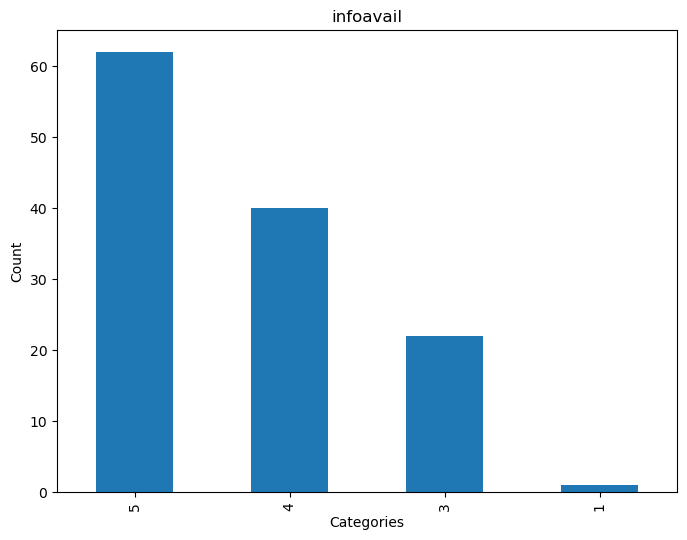

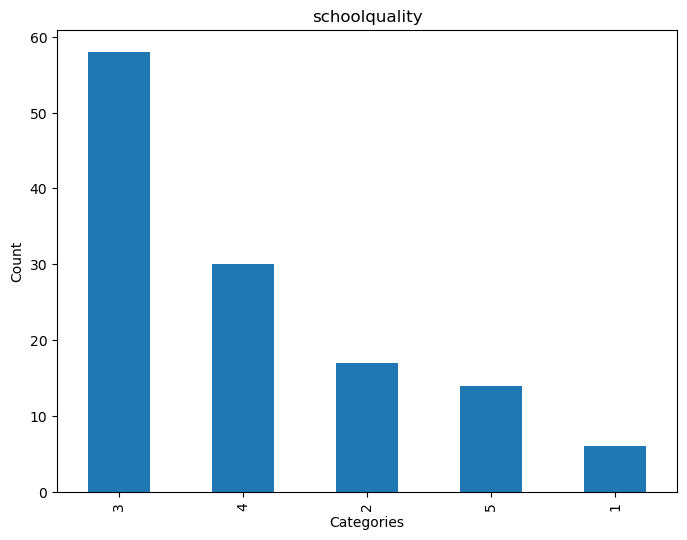

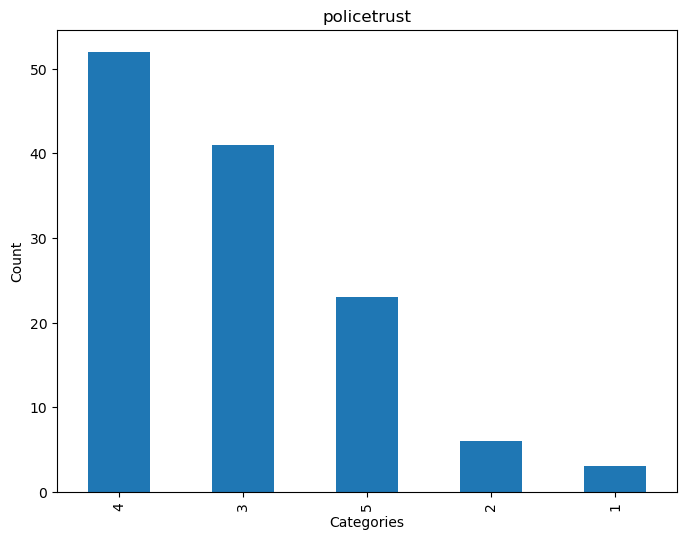

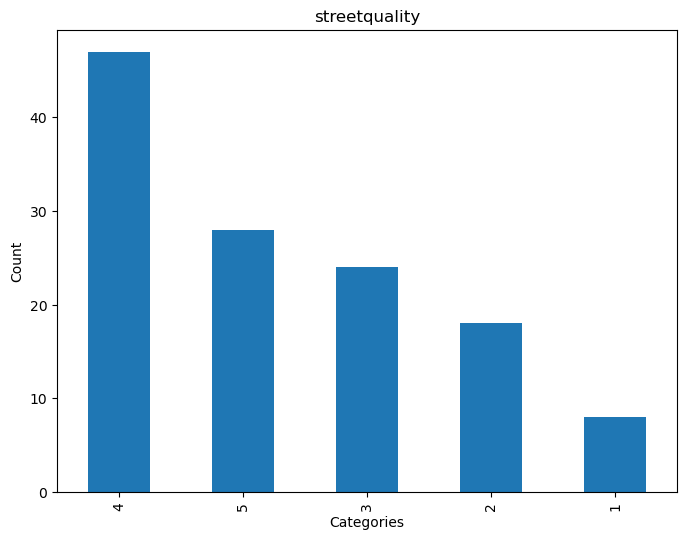

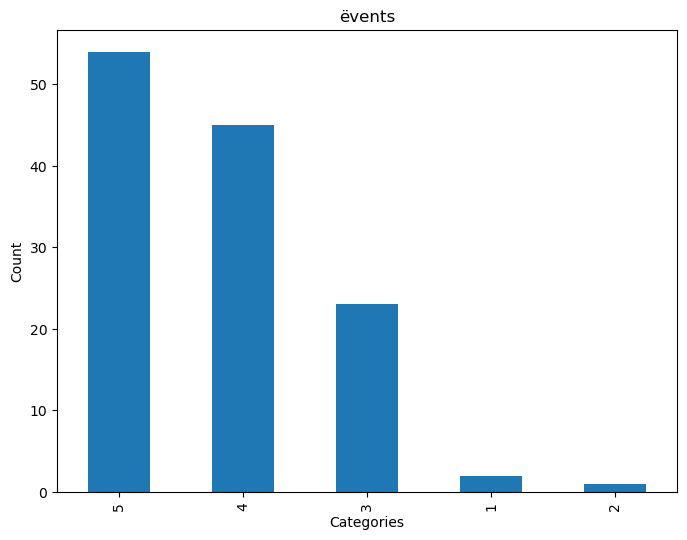

In [19]:
cat_vars = ['infoavail', 'schoolquality', 'policetrust', 'streetquality', 'ëvents']
for var in cat_vars:
    plt.figure(figsize=(8, 6))
    data[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

**Box plots**

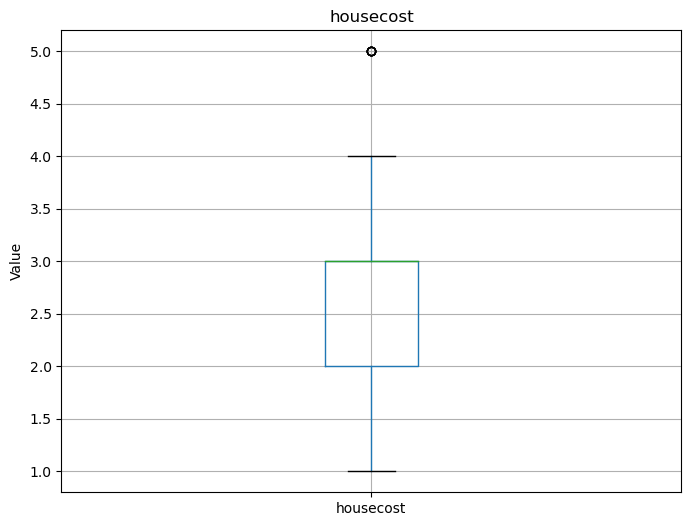

In [20]:
num_vars = ['housecost']
for var in num_vars:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=var)
    plt.title(var)
    plt.ylabel('Value')
    plt.show()

**Scatter plot**

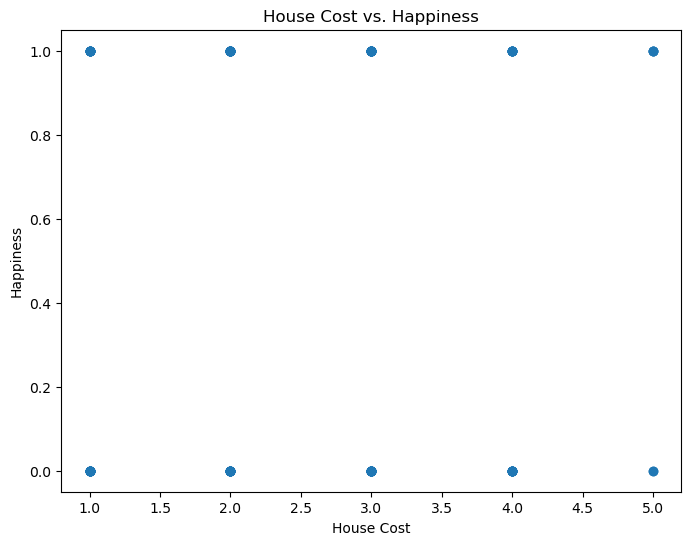

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(data['housecost'], data['happy'])
plt.title('House Cost vs. Happiness')
plt.xlabel('House Cost')
plt.ylabel('Happiness')
plt.show()

**Pair plots**

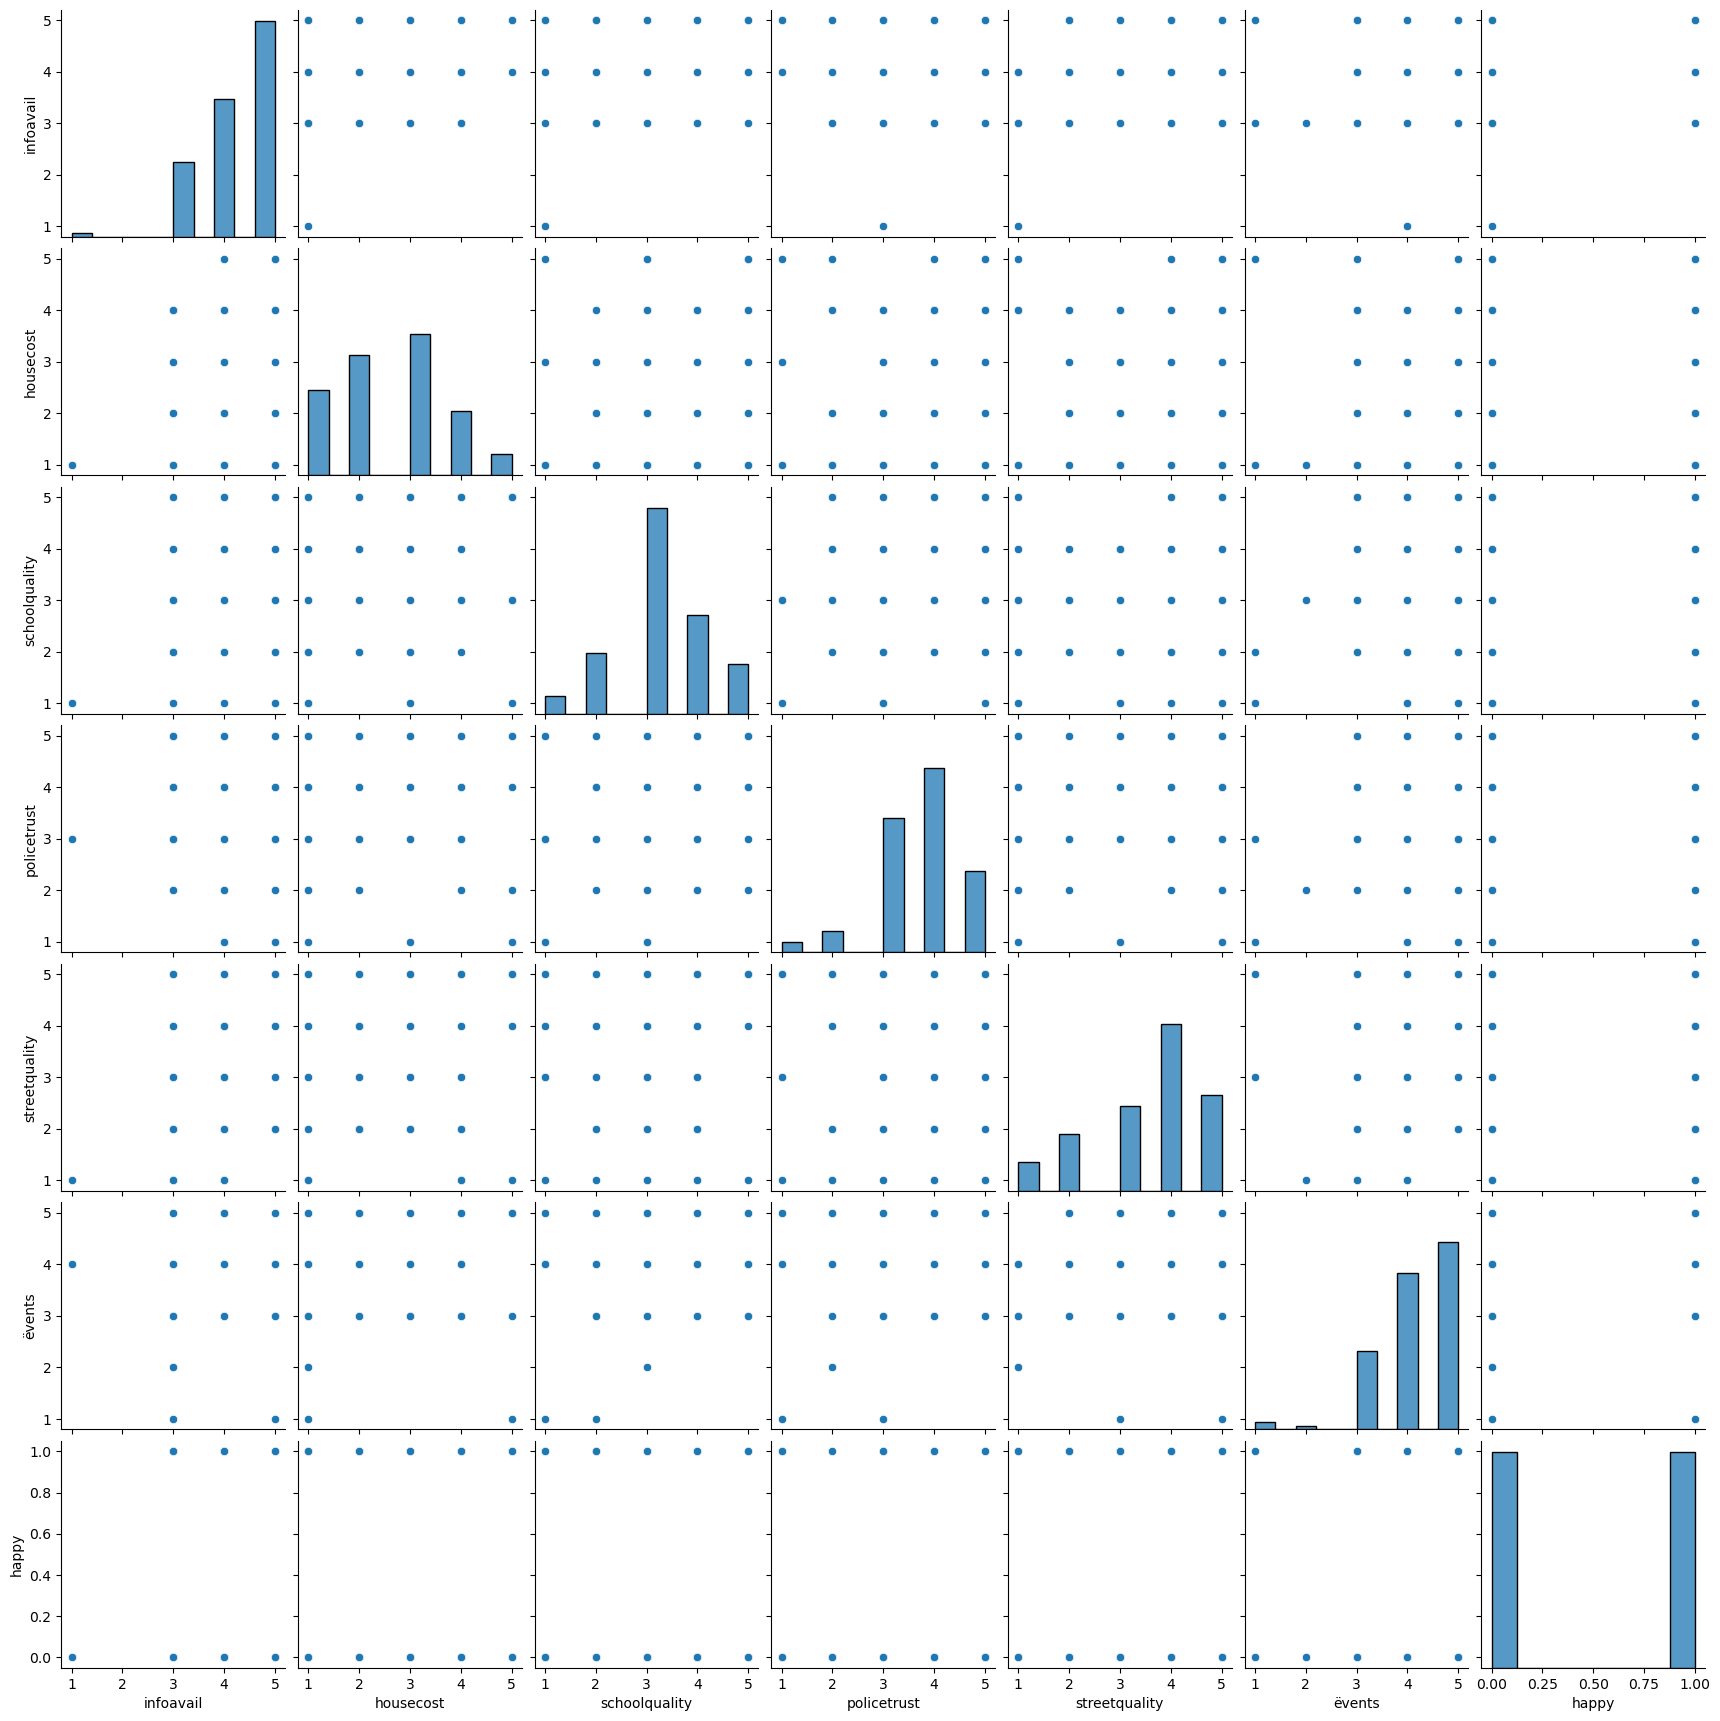

In [22]:
# Create pair plots
sns.pairplot(data_no_outliers)
plt.show()

<Figure size 800x600 with 0 Axes>

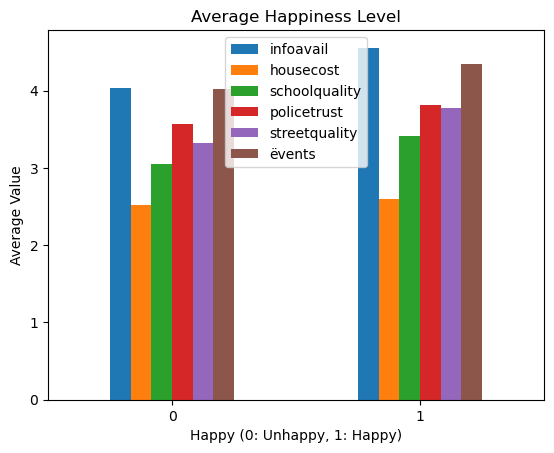

In [23]:
# Bar plots
plt.figure(figsize=(8, 6))
data.groupby('happy').mean().plot(kind='bar')
plt.title('Average Happiness Level')
plt.xlabel('Happy (0: Unhappy, 1: Happy)')
plt.ylabel('Average Value')
plt.legend(loc='upper center')
plt.xticks(rotation=0)
plt.show()

<h1><center style="color:#159364; font-family:cursive;">Feature-specific analysis</center></h1>

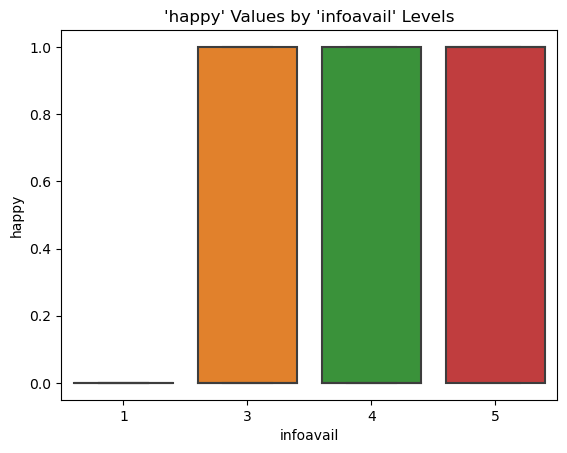

In [24]:
# Compare 'happy' values based on 'infoavail' levels
sns.boxplot(x='infoavail', y='happy', data=data_no_outliers)
plt.title("'happy' Values by 'infoavail' Levels")
plt.show()

<h1><center style="color:#159364; font-family:cursive;">Model Building</center></h1>

In [25]:
# Split the dataset into features (X) and target variable (y)
X = data_no_outliers.drop('happy', axis=1)
y = data_no_outliers['happy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.44


An accuracy of 0.44 indicates that the logistic regression model correctly predicted the 'happy' class for 44% of the test data instances. While accuracy is a commonly used metric for classification tasks, it may not provide a complete picture of model performance, especially if the dataset is imbalanced or there are other factors at play.

To gain a better understanding of the model's performance, you can consider evaluating other evaluation metrics such as precision, recall, and F1-score. Additionally, you may want to explore other classification algorithms or perform further data preprocessing and feature engineering to improve the model's predictive capabilities.


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 It's important to note that machine learning models can have varying performance depending on the specific dataset and problem domain. It's recommended to experiment with different models, hyperparameter tuning, and cross-validation techniques to find the best approach for your specific task.
</div>

In [27]:
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.625
Recall: 0.3125
F1-score: 0.4166666666666667


**Precision: 0.625**
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. In this case, the model achieved a precision of 0.625, indicating that 62.5% of the instances predicted as "happy" were actually labeled correctly.

**Recall: 0.3125**
Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. The recall value of 0.3125 indicates that the model captured 31.25% of the actual positive instances.

**F1-score: 0.4166666666666667**
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that combines both precision and recall. The F1-score of 0.4167 indicates the overall performance of the model, considering both precision and recall.

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest classifier
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.5714285714285714
Recall: 0.5
F1-score: 0.5333333333333333


**Precision: 0.5833**
The precision score of 0.5833 indicates that approximately 58.33% of the instances predicted as "happy" were actually labeled correctly.

**Recall: 0.4375**
The recall score of 0.4375 suggests that the model captured around 43.75% of the actual positive instances.

**F1-score: 0.5**
The F1-score, which is the harmonic mean of precision and recall, provides an overall measure of the model's performance. With an F1-score of 0.5, the model's performance is moderate in terms of balancing precision and recall.

<h1><center style="color:#159364; font-family:cursive;">Hyperparameter Tuning</center></h1>

In [29]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X, y, cv=5)

# Get feature importance
feature_importance = best_model.feature_importances_

print("Best Parameters:", best_params)
print("Cross-Validation Scores:", cv_scores)
print("Feature Importance:", feature_importance)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Scores: [0.48       0.6        0.625      0.75       0.45833333]
Feature Importance: [0.24919295 0.14783444 0.19021172 0.12808223 0.15886412 0.12581455]


In [30]:
# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1-score:", f1)

Test Set Accuracy: 0.44
Test Set Precision: 0.625
Test Set Recall: 0.3125
Test Set F1-score: 0.4166666666666667


<h1><center style="color:#159364; font-family:cursive;">Conclusion</center></h1>

The analysis suggests that city metrics, such as the availability of information, school quality, police trust, street quality, and social community events, can have an impact on residents' happiness. However, the model's performance indicates room for improvement, and further exploration and refinement of the model can potentially enhance its predictive power.

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Based on the evaluation results, further steps can include fine-tuning the model, exploring ensemble methods, conducting more feature engineering, handling class imbalance, interpreting the model's predictions, and considering model deployment in a production environment.
</div>